In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.datasets import mnist

2024-04-10 04:36:13.256179: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 04:36:13.256272: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 04:36:13.381858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import os
import sys

# Redirect stderr to /dev/null
sys.stderr = open(os.devnull, 'w')

In [6]:
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import SGD
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(
    42
)


In [ ]:
class preprocess(Layer):
    def call(self, x):
        y = tf.keras.layers.Rescaling(scale= 1./255)(x)
        
        
        return  tf.keras.layers.Rescaling

In [ ]:
def load_model(model_path):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

    return model

In [ ]:
def load_model(model_path):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [7]:
class padm(Layer):
    def call(self, x):
        return tf.pad(x, ((0, 0), (3, 3), (3, 3), (0, 0)))


In [8]:
def load_model(model_path):

    img = tf.keras.Input(shape=(32, 32, 3))
    n = tf.keras.layers.BatchNormalization()(img)
    pad = padm()(n)
    conv = Conv2D(64, kernel_size=(5, 5), strides = (2, 2))(pad)
    norm = tf.keras.layers.BatchNormalization()(conv)
    act = tf.keras.layers.Activation("relu")(norm)
    mxpool = MaxPooling2D(pool_size=(2, 2))(act)
    pad1 = padm()(mxpool)
    conv1 = Conv2D(64, kernel_size=(5, 5),strides = (2, 2))(pad1)
    norm1 = tf.keras.layers.BatchNormalization()(conv1)
    act1 = tf.keras.layers.Activation("relu")(norm1)
    mxpool1 = MaxPooling2D(pool_size=(2, 2))(act1)
    pad2 = padm()(mxpool1)
    conv2 = Conv2D(64, kernel_size=(5, 5),strides = (2, 2))(pad2)
    norm2 = tf.keras.layers.BatchNormalization()(conv2)
    act2 = tf.keras.layers.Activation("relu")(norm2)
    mxpool2 = MaxPooling2D(pool_size=(2, 2))(act2)
    flatten = Flatten()(norm2)
    dense = Dense(2048)(flatten)
    norm3 = tf.keras.layers.BatchNormalization()(dense)
    dense1 = Dense(512)(norm3)
    norm4 = tf.keras.layers.BatchNormalization()(dense1)
    dense2 = Dense(10, activation='softmax')(norm4)
    model = tf.keras.Model(inputs=img, outputs=dense2, name="svhn_model")


    return model

In [ ]:
# Load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    random_indices = np.random.choice(len(trainX), 12209, replace=False)

    # Select the subset of data and labels
    subset_X = trainX[random_indices]
    subset_Y = trainY[random_indices]
    return subset_X, subset_Y, testX, testY

In [ ]:
data_dir = "/kaggle/input/synthetic-digits/synthetic_digits/imgs_train"
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(32, 32),
        batch_size=10000,
        class_mode='categorical',  # change this if you have different label types
        shuffle=True
        )
train_images = []
train_labels = []
for i in train_generator:
        train_images, train_labels = i
        break
print(train_images)

In [9]:
# Load train and test dataset
def load_dataset():

    (train_image, train_label) = tfds.as_numpy(tfds.load('svhn_cropped', split='train',batch_size=-1 ,shuffle_files=True, as_supervised=True))
    (test_image, test_label) = tfds.as_numpy(tfds.load('svhn_cropped', split='test',batch_size=-1 ,shuffle_files=True, as_supervised=True))
    train_image = train_image[:10000]
    train_label = train_label[:10000]
    trainX = []
    trainY = []
    C = tf.constant(10, name = "C")
    one_hot_train = tf.one_hot(
    train_label, C, on_value = 1.0, off_value = 0.0, axis =-1)
    one_hot_test = tf.one_hot(
    test_label, C, on_value = 1.0, off_value = 0.0, axis =-1)
    for i in range(0,3):
      trainX.append(train_image[i * int(10000 / 3) : (i + 1) * int(10000 / 3)])
      trainY.append(one_hot_train[i * int(10000 / 3) : (i + 1) * int(10000 / 3)])

    data_dir = "/kaggle/input/synthetic-digits/synthetic_digits/imgs_train"
    train_datagen = ImageDataGenerator()
    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(32, 32),
        batch_size=10000,
        class_mode='categorical',  # change this if you have different label types
        shuffle=True
        )
    train_images = []
    train_labels = []
    for i in train_generator:
        train_images, train_labels = i
        break
    for i in range(0,3):
      trainX.append(train_images[i * int(10000 / 3) : (i + 1) * int(10000 / 3)])
      trainY.append(train_labels[i * int(10000 / 3) : (i + 1) * int(10000 / 3)])

    
    return trainX, trainY, test_image, one_hot_test


In [ ]:
# scale pixels
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

In [10]:
trainX, trainY, testX, testY = load_dataset()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteNQRJVN/svhn_cropped-train.tfrecord*...:   0%|…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteNQRJVN/svhn_cropped-test.tfrecord*...:   0%| …

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incompleteNQRJVN/svhn_cropped-extra.tfrecord*...:   0%|…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.
Found 10000 images belonging to 10 classes.


In [12]:
def get_non_bn_weights(model):
  non_bn_weights = []
  for layer in model.layers:
    # Check if the layer is not a BatchNormalization layer
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        # Get the layer weights
        weights = layer.get_weights()
        # If the layer has weights, add them to the non_bn_weights list
        if len(weights) > 0:
            non_bn_weights.extend(weights)
  return non_bn_weights


In [13]:
def set_non_bn_weights(model, new_weights):
    weight_index = 0

    # Iterate through the layers of the model
    for layer in model.layers:
        # Check if the layer is not a BatchNormalization layer
        if not isinstance(layer, tf.keras.layers.BatchNormalization):
            # Get the layer weights
            weights = layer.get_weights()
            # If the layer has weights, set them with the new weights from the list
            if len(weights) > 0:
                # Set the layer weights with the new weights from the list
                layer.set_weights([new_weights[weight_index], new_weights[weight_index + 1]])
                # Move to the next set of new weights and biases
                weight_index += 2


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
def initializeC():
  model = load_model("")
  C = get_non_bn_weights(model)
  for i in C:
      i.fill(0)
  return C

In [ ]:
model = load_model("")


In [20]:
class ClientScaffold:
    def __init__(self, trainX, trainY, testX,
                 testY, batchSize, model,
                 loss, metrics, lr, optim=tf.keras.optimizers.SGD):
        self.model = model
        self.c = self.initializeC()
        self.cPlus = self.initializeC()
        self.trainX = trainX
        self.trainY = trainY
        self.testX = testX
        self.testY = testY
        self.batch = batchSize
        self.lr = float(lr)
        self.losses = loss
        self.metrics = metrics
        self.optim = optim
        self.test_loss = []
        self.test_acc = []
        self.model.compile(optimizer=self.optim(learning_rate = self.lr),
                           loss=self.losses, metrics=self.metrics)
        # Split the data into batches
        num_batches = len(self.trainX) // self.batch
        self.batches = np.array_split(self.trainX, self.batch)
        self.batchesY = np.array_split(self.trainY, self.batch)
        remaining_data = self.trainX[num_batches * self.batch:]
        if len(remaining_data) > 0:
            self.batches.append(remaining_data)
            self.batchesY.append(self.trainY[num_batches * self.batch:])

    def train(self, C, Global):
        set_non_bn_weights(self.model, Global)
        results = self.model.evaluate(self.trainX, self.trainY, verbose=0)
        self.test_loss.append(results[0])
        self.test_acc.append(results[1])        
        print("Clients:",results,"\n")

        for i in range(0, len(self.batches)):
            self.model.fit(
                self.batches[i], self.batchesY[i], verbose=0
            )
            weights = list(get_non_bn_weights(self.model))
            for i in range(0, len(Global)):
                weights[i] -= (self.lr) * (C[i] - self.c[i])
            set_non_bn_weights(self.model, weights)

        weights = list(get_non_bn_weights(self.model))
        delta_weights = list(weights)
        delta_C = list(self.cPlus)
        for i in range(0, len(weights)):
            self.cPlus[i] = self.c[i] - C[i] +((1 / (len(self.batches) * self.lr)) * (Global[i] - weights[i]))
            delta_weights[i] -= Global[i]
            delta_C[i] = self.cPlus[i] - self.c[i]
        self.c = list(self.cPlus)
        
        return delta_weights, delta_C, len(self.trainX)

    def initializeC(self):
        C = get_non_bn_weights(self.model)
        for i in C:
            i.fill(0)
        return C

In [21]:
class Server:
  def __init__(self, global_lr, clients_num):
    self.C = initializeC()
    self.global_model = load_model(model_path = " ")
    self.global_model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
    )
    self.global_lr = global_lr
    self.clients_num = clients_num
  def initiate(self):
    self.clients = []
    optim = tf.keras.optimizers.SGD
    for i in range(0,self.clients_num):
      self.clients.append(ClientScaffold(trainX[i], trainY[i], testX, testY, 32
                                         ,load_model("")
                                         ,tf.keras.losses.CategoricalCrossentropy(from_logits=True)
                                         ,[tf.keras.metrics.CategoricalAccuracy()]
                                         , 0.02,optim))
  def train(self, rounds):
      weights = list(get_non_bn_weights(self.global_model))
      c_temp = initializeC()
      for j in range(0,rounds):
        print("round",j,"\n")
        for client in self.clients:
             [delta_weights , delta_c , num_val] = client.train(self.C , get_non_bn_weights(self.global_model))
             for i in range(0 , len(weights)):
                  weights[i] = weights[i] + (delta_weights[i] * (self.global_lr  /float(self.clients_num)))
                  c_temp[i] = c_temp[i] + (delta_c[i] * (1.0 / self.clients_num))
        set_non_bn_weights(self.global_model, weights)
        self.C = c_temp
  def average_out(self):
      final_weights = self.global_model.get_weights()
      for i in final_weights:
            i.fill(0)
      for client in self.clients:
            weights = list(get_non_bn_weights(client.model))
            set_non_bn_weights(client.model, get_non_bn_weights(self.global_model))
      
      for client in self.clients:
            weights = list(client.model.get_weights())
            for i in range(0,len(weights)):
                final_weights[i] = final_weights[i] + (weights[i] * (1.0/self.clients_num))
      self.global_model.set_weights(final_weights)
      print("Global:",self.global_model.evaluate(testX, testY),"\n")

            
    

In [22]:
server = Server(1, 6)

In [23]:
server.initiate()

In [24]:
server.train(20)

round 0 

Clients: [13.144402503967285, 0.09090909361839294] 

Clients: [13.141474723815918, 0.09420941770076752] 

Clients: [13.031402587890625, 0.09360936284065247] 

Clients: [15.976381301879883, 0.09360936284065247] 

Clients: [16.099206924438477, 0.10051005333662033] 

Clients: [16.040016174316406, 0.10531052947044373] 

round 1 

Clients: [2.27787184715271, 0.11701170355081558] 

Clients: [2.2820487022399902, 0.1710170954465866] 

Clients: [2.318505048751831, 0.08730872720479965] 

Clients: [2.265352487564087, 0.16651664674282074] 

Clients: [2.2796101570129395, 0.14851485192775726] 

Clients: [2.2927632331848145, 0.13141314685344696] 

round 2 

Clients: [1.9481056928634644, 0.3831382989883423] 

Clients: [1.9992510080337524, 0.34833481907844543] 

Clients: [1.9632493257522583, 0.3576357662677765] 

Clients: [1.959812879562378, 0.32763275504112244] 

Clients: [2.0507755279541016, 0.2541254162788391] 

Clients: [1.9833970069885254, 0.27272728085517883] 

round 3 

Clients: [1.663

In [ ]:
final_loss = []
final_acc = []
for i in range(0, 5):
    server = Server(1, 6)
    server.initiate()
    server.train(20)
    loss = []
    acc = []
    for i in server.clients:
        loss.append(i.test_loss)
        acc.append(i.test_acc)
    final_loss.append(np.array(loss))
    final_acc.append(np.array(acc))

In [44]:
final_loss = np.array(final_loss)

In [46]:
final_acc = np.array(final_acc)

In [92]:
averaged_loss = np.mean(final_loss, axis=0)
averaged_loss

array([[ 9.78753738,  2.26382484,  2.08168011,  1.74141841,  1.48334653,
         1.35888364,  1.26922176,  1.19408827,  1.15037956,  1.11824105,
         1.07917209,  1.04511579,  0.99920459,  0.96649866,  0.9701074 ,
         0.91431645,  0.93640727,  0.89943743,  0.87039338,  0.8999072 ],
       [ 9.8065485 ,  2.26411886,  2.08434014,  1.75328944,  1.50378022,
         1.38707607,  1.3011194 ,  1.23043149,  1.18078685,  1.16227081,
         1.1148694 ,  1.08734806,  1.03579684,  0.99724613,  1.00744301,
         0.94887575,  0.98277946,  0.94116304,  0.91313684,  0.9454409 ],
       [ 9.71368618,  2.26318192,  2.07942958,  1.73574026,  1.47246418,
         1.35361407,  1.26828642,  1.19341779,  1.14427621,  1.1231647 ,
         1.07279718,  1.04700454,  0.99372368,  0.96041292,  0.96489328,
         0.9154547 ,  0.93945071,  0.90096649,  0.87209342,  0.9026265 ],
       [13.92121296,  2.26031141,  1.97898235,  1.37653143,  1.04513848,
         0.83486532,  0.76196842,  0.6504398 ,  

In [93]:
averaged_accuracy = np.mean(final_acc, axis=0)
averaged_accuracy

array([[0.11263126, 0.20486048, 0.33327332, 0.43492349, 0.5379538 ,
        0.56033604, 0.58217822, 0.6160216 , 0.63048304, 0.64656465,
        0.64968495, 0.65916591, 0.68754874, 0.69588959, 0.70735073,
        0.72139213, 0.68694869, 0.71149114, 0.73033303, 0.70513052],
       [0.11059106, 0.19825983, 0.32829283, 0.42754276, 0.52049204,
        0.54863485, 0.56615661, 0.60444045, 0.61698169, 0.62736274,
        0.63438343, 0.64344434, 0.67026703, 0.68286828, 0.68808881,
        0.70189019, 0.66876688, 0.69348935, 0.71059105, 0.68592861],
       [0.11323132, 0.20270027, 0.3350135 , 0.44350435, 0.54365435,
        0.57053705, 0.58169818, 0.62034204, 0.63012302, 0.64824482,
        0.65364538, 0.66348635, 0.69042906, 0.70165017, 0.70663067,
        0.71761175, 0.68532853, 0.71323133, 0.73135313, 0.70753076],
       [0.09618962, 0.1770177 , 0.34839484, 0.54821482, 0.65046505,
        0.72487249, 0.7518752 , 0.78571858, 0.79537954, 0.81608161,
        0.83540354, 0.83852385, 0.85052506, 0

In [95]:
svhn = []
synth = []
for i in range(3,6):
    synth.append(averaged_accuracy[i][19])
for i in range(0,3):
    svhn.append(averaged_accuracy[i][19])

In [96]:
svhn

[0.7051305174827576, 0.6859286069869995, 0.7075307607650757]

In [97]:
synth

[0.9018301725387573, 0.8957695841789246, 0.8985298633575439]

In [31]:
final_loss = []
final_acc = []
for i in server.clients:
    final_loss.append(i.test_loss)
    final_acc.append(i.test_acc)

In [32]:
final_loss

[[13.144402503967285,
  2.27787184715271,
  1.9481056928634644,
  1.6630107164382935,
  1.3522497415542603,
  1.1774314641952515,
  1.1411975622177124,
  1.0397953987121582,
  1.0372573137283325,
  0.9150772094726562,
  0.8014678359031677,
  0.8230248093605042,
  0.7896373867988586,
  0.7361480593681335,
  0.7211151123046875,
  0.7078524827957153,
  0.6011989116668701,
  0.6099422574043274,
  0.6150352358818054,
  0.6139370203018188],
 [13.141474723815918,
  2.2820487022399902,
  1.9992510080337524,
  1.5738861560821533,
  1.304271936416626,
  1.1961108446121216,
  1.1396276950836182,
  1.0420349836349487,
  1.0066876411437988,
  0.892866849899292,
  0.9217814207077026,
  0.8594586253166199,
  0.8359649777412415,
  0.7976087927818298,
  0.723702073097229,
  0.7976219654083252,
  0.6933326125144958,
  0.6823112964630127,
  0.7029906511306763,
  0.6306748390197754],
 [13.031402587890625,
  2.318505048751831,
  1.9632493257522583,
  1.5395549535751343,
  1.1989479064941406,
  1.1540313959

In [33]:
final_acc

[[0.09090909361839294,
  0.11701170355081558,
  0.3831382989883423,
  0.4335433542728424,
  0.543354332447052,
  0.6204620599746704,
  0.6291629076004028,
  0.6576657891273499,
  0.669966995716095,
  0.7071707248687744,
  0.7572757005691528,
  0.7338733673095703,
  0.7617761492729187,
  0.7728772759437561,
  0.7830783128738403,
  0.7845784425735474,
  0.8316831588745117,
  0.824182391166687,
  0.8079807758331299,
  0.805880606174469],
 [0.09420941770076752,
  0.1710170954465866,
  0.34833481907844543,
  0.45634564757347107,
  0.5715571641921997,
  0.6156615614891052,
  0.614761471748352,
  0.6456645727157593,
  0.6825682520866394,
  0.724572479724884,
  0.7101710438728333,
  0.7329732775688171,
  0.7485748529434204,
  0.7563756108283997,
  0.7818781733512878,
  0.7362736463546753,
  0.7899789810180664,
  0.7830783128738403,
  0.7755775451660156,
  0.8064806461334229],
 [0.09360936284065247,
  0.08730872720479965,
  0.3576357662677765,
  0.46234622597694397,
  0.6216621398925781,
  0.62

In [34]:
categories = {'0' : [0,0,0,0,0,0],'1' : [0,0,0,0,0,0],'2' : [0,0,0,0,0,0],'3' :[0,0,0,0,0,0],'4' : [0,0,0,0,0,0],'5' : [0,0,0,0,0,0],'6' : [0,0,0,0,0,0],'7' : [0,0,0,0,0,0] ,'8' : [0,0,0,0,0,0],'9' : [0,0,0,0,0,0]}
for i in range (0,6):
  for j in trainY[i]:
    for k in range(0,10):
      if (j[k] == 1):
        categories[str(k)][i]  = categories[str(k)][i] + 1

In [ ]:
categories

In [37]:
actual = []
for i in range(0,10):
  actual.append(categories[str(i)])
actual =np.array(actual)


In [38]:
import matplotlib.pyplot as plt

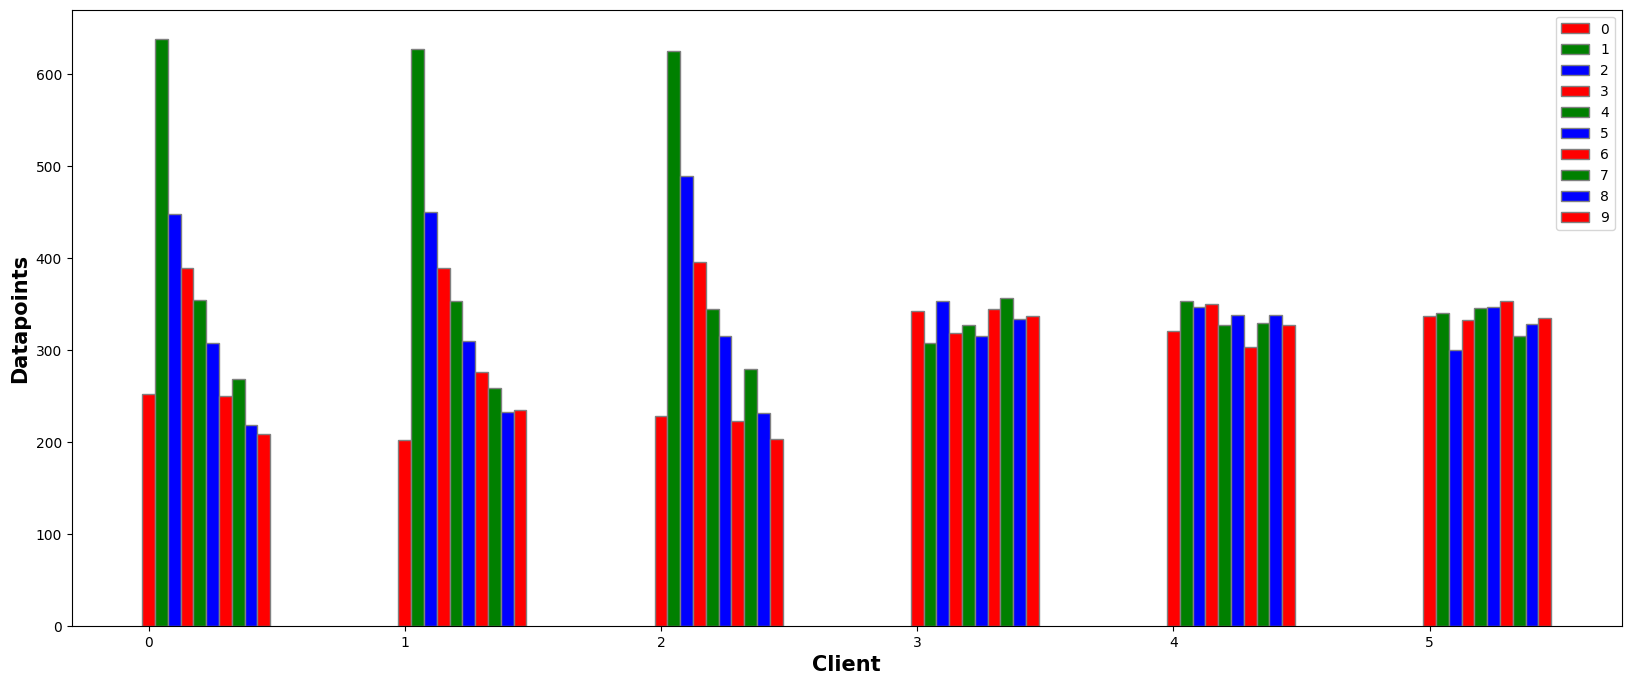

In [40]:
barWidth = 0.05
fig = plt.subplots(figsize =(20, 8))


# Set position of bar on X axis
br1 = np.arange(len(actual[0]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]
br8 = [x + barWidth for x in br7]
br9 = [x + barWidth for x in br8]
br10 = [x + barWidth for x in br9]


# Make the plot
plt.bar(br1, actual[0], color ='r', width = barWidth,
        edgecolor ='grey', label ='0')
plt.bar(br2, actual[1], color ='g', width = barWidth,
        edgecolor ='grey', label ='1')
plt.bar(br3, actual[2], color ='b', width = barWidth,
        edgecolor ='grey', label ='2')
plt.bar(br4, actual[3], color ='r', width = barWidth,
        edgecolor ='grey', label ='3')
plt.bar(br5, actual[4], color ='g', width = barWidth,
        edgecolor ='grey', label ='4')
plt.bar(br6, actual[5], color ='b', width = barWidth,
        edgecolor ='grey', label ='5')
plt.bar(br7, actual[6], color ='r', width = barWidth,
        edgecolor ='grey', label ='6')
plt.bar(br8, actual[7], color ='g', width = barWidth,
        edgecolor ='grey', label ='7')
plt.bar(br9, actual[8], color ='b', width = barWidth,
        edgecolor ='grey', label ='8')
plt.bar(br10, actual[9], color ='r', width = barWidth,
        edgecolor ='grey', label ='9')

# Adding Xticks
plt.xlabel('Client', fontweight ='bold', fontsize = 15)
plt.ylabel('Datapoints', fontweight ='bold', fontsize = 15)


plt.legend()
plt.show()

In [98]:
[i for i in range (1,11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

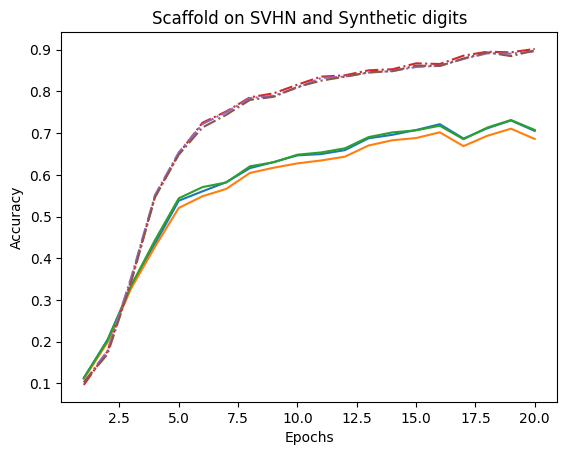

In [113]:


import matplotlib.pyplot as plt
import numpy as np
 
x = np.array([i for i in range (1,21)])
y = np.array([[0.11263126, 0.20486048, 0.33327332, 0.43492349, 0.5379538 ,
        0.56033604, 0.58217822, 0.6160216 , 0.63048304, 0.64656465,
        0.64968495, 0.65916591, 0.68754874, 0.69588959, 0.70735073,
        0.72139213, 0.68694869, 0.71149114, 0.73033303, 0.70513052],
       [0.11059106, 0.19825983, 0.32829283, 0.42754276, 0.52049204,
        0.54863485, 0.56615661, 0.60444045, 0.61698169, 0.62736274,
        0.63438343, 0.64344434, 0.67026703, 0.68286828, 0.68808881,
        0.70189019, 0.66876688, 0.69348935, 0.71059105, 0.68592861],
       [0.11323132, 0.20270027, 0.3350135 , 0.44350435, 0.54365435,
        0.57053705, 0.58169818, 0.62034204, 0.63012302, 0.64824482,
        0.65364538, 0.66348635, 0.69042906, 0.70165017, 0.70663067,
        0.71761175, 0.68532853, 0.71323133, 0.73135313, 0.70753076],
       [0.09618962, 0.1770177 , 0.34839484, 0.54821482, 0.65046505,
        0.72487249, 0.7518752 , 0.78571858, 0.79537954, 0.81608161,
        0.83540354, 0.83852385, 0.85052506, 0.85304532, 0.86726673,
        0.86564655, 0.88568858, 0.8951095 , 0.89366937, 0.90183017],
       [0.10231023, 0.17839784, 0.35493549, 0.55175519, 0.65388539,
        0.72169217, 0.74983499, 0.78379838, 0.78949894, 0.80870086,
        0.8321032 , 0.83546355, 0.84500451, 0.84872488, 0.85844585,
        0.86144614, 0.87776778, 0.89120911, 0.89042903, 0.89576958],
       [0.10237024, 0.169997  , 0.34359436, 0.5459946 , 0.6481248 ,
        0.71347134, 0.74371437, 0.77953796, 0.78703871, 0.81074108,
        0.82574258, 0.83516351, 0.84578458, 0.84842485, 0.86186619,
        0.86096609, 0.8789079 , 0.89372935, 0.88448846, 0.89852986]])
 
# first plot with X and Y data
for i in y[:3]:
    plt.plot(x, i)
for i in y[3:]:
    plt.plot(x,i,'-.')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Scaffold on SVHN and Synthetic digits') 
plt.show()


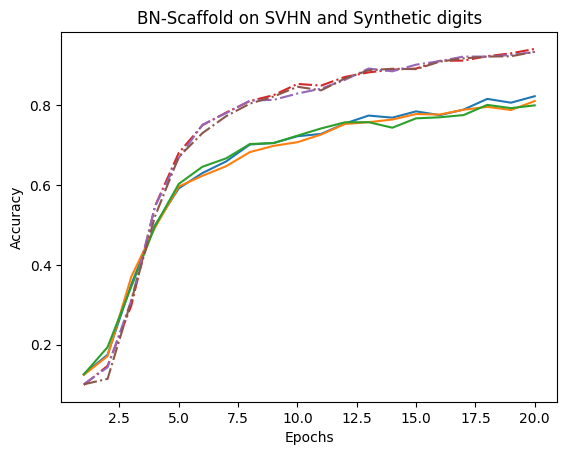

In [112]:


import matplotlib.pyplot as plt
import numpy as np
 
x = np.array([i for i in range (1,21)])
y = np.array([[0.12631263, 0.17485749, 0.35103511, 0.49930993, 0.59153917,
        0.630003  , 0.65916591, 0.70147015, 0.70519053, 0.7220522 ,
        0.7279328 , 0.75391538, 0.77389739, 0.76861686, 0.78439844,
        0.77497751, 0.78877888, 0.81566157, 0.80612062, 0.82238224],
       [0.12439244, 0.17155716, 0.37023702, 0.49348934, 0.59615961,
        0.62310232, 0.64716471, 0.68244824, 0.69804981, 0.70723072,
        0.72631264, 0.75271527, 0.75727572, 0.7639964 , 0.77767776,
        0.77653766, 0.78847885, 0.79567956, 0.78781878, 0.81020103],
       [0.12571257, 0.19393939, 0.34515452, 0.49726973, 0.60270027,
        0.64578458, 0.66678667, 0.70261025, 0.7050705 , 0.72355235,
        0.74167416, 0.75697569, 0.75733575, 0.74347435, 0.7669367 ,
        0.76957695, 0.77509751, 0.80060008, 0.79249926, 0.79945993],
       [0.09936994, 0.14719472, 0.29762976, 0.54725472, 0.68046806,
        0.74971497, 0.78151816, 0.81038103, 0.82508249, 0.85310532,
        0.84896489, 0.87062706, 0.88202821, 0.88886888, 0.89162917,
        0.9109511 , 0.91155115, 0.92259227, 0.92973298, 0.94077408],
       [0.10129013, 0.14353436, 0.31089109, 0.54611462, 0.66798681,
        0.75103511, 0.78007802, 0.81122112, 0.81338134, 0.8289829 ,
        0.84140414, 0.86330633, 0.89162916, 0.88466846, 0.90135014,
        0.91023104, 0.92163216, 0.92145215, 0.92565256, 0.93315332],
       [0.10087009, 0.11449145, 0.31005101, 0.52163216, 0.67050705,
        0.730033  , 0.77251724, 0.80378038, 0.82166216, 0.84602462,
        0.83708371, 0.86666667, 0.88730873, 0.89108911, 0.89012901,
        0.9089709 , 0.91713171, 0.92163217, 0.92241224, 0.93363336]])
 
# first plot with X and Y data
for i in y[:3]:
    plt.plot(x, i)
for i in y[3:]:
    plt.plot(x,i,'-.')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('BN-Scaffold on SVHN and Synthetic digits') 
plt.show()


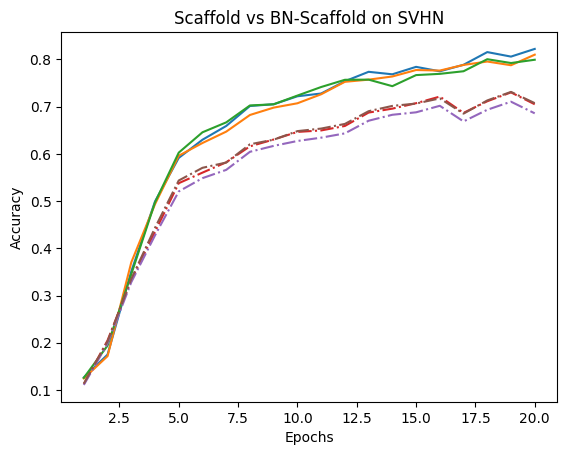

In [111]:
import matplotlib.pyplot as plt
import numpy as np
 
x = np.array([i for i in range (1,21)])
y = np.array([[0.12631263, 0.17485749, 0.35103511, 0.49930993, 0.59153917,
        0.630003  , 0.65916591, 0.70147015, 0.70519053, 0.7220522 ,
        0.7279328 , 0.75391538, 0.77389739, 0.76861686, 0.78439844,
        0.77497751, 0.78877888, 0.81566157, 0.80612062, 0.82238224],
       [0.12439244, 0.17155716, 0.37023702, 0.49348934, 0.59615961,
        0.62310232, 0.64716471, 0.68244824, 0.69804981, 0.70723072,
        0.72631264, 0.75271527, 0.75727572, 0.7639964 , 0.77767776,
        0.77653766, 0.78847885, 0.79567956, 0.78781878, 0.81020103],
       [0.12571257, 0.19393939, 0.34515452, 0.49726973, 0.60270027,
        0.64578458, 0.66678667, 0.70261025, 0.7050705 , 0.72355235,
        0.74167416, 0.75697569, 0.75733575, 0.74347435, 0.7669367 ,
        0.76957695, 0.77509751, 0.80060008, 0.79249926, 0.79945993],
        [0.11263126, 0.20486048, 0.33327332, 0.43492349, 0.5379538 ,
        0.56033604, 0.58217822, 0.6160216 , 0.63048304, 0.64656465,
        0.64968495, 0.65916591, 0.68754874, 0.69588959, 0.70735073,
        0.72139213, 0.68694869, 0.71149114, 0.73033303, 0.70513052],
       [0.11059106, 0.19825983, 0.32829283, 0.42754276, 0.52049204,
        0.54863485, 0.56615661, 0.60444045, 0.61698169, 0.62736274,
        0.63438343, 0.64344434, 0.67026703, 0.68286828, 0.68808881,
        0.70189019, 0.66876688, 0.69348935, 0.71059105, 0.68592861],
       [0.11323132, 0.20270027, 0.3350135 , 0.44350435, 0.54365435,
        0.57053705, 0.58169818, 0.62034204, 0.63012302, 0.64824482,
        0.65364538, 0.66348635, 0.69042906, 0.70165017, 0.70663067,
        0.71761175, 0.68532853, 0.71323133, 0.73135313, 0.70753076]])
 
# first plot with X and Y data
for i in y[:3]:
    plt.plot(x, i)
for i in y[3:]:
    plt.plot(x,i,'-.')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Scaffold vs BN-Scaffold on SVHN')
plt.show()

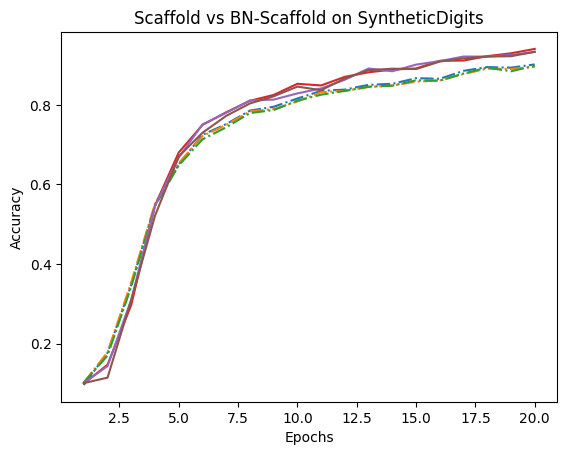

In [116]:
import matplotlib.pyplot as plt
import numpy as np
 
x = np.array([i for i in range (1,21)])
y = np.array([[0.09618962, 0.1770177 , 0.34839484, 0.54821482, 0.65046505,
        0.72487249, 0.7518752 , 0.78571858, 0.79537954, 0.81608161,
        0.83540354, 0.83852385, 0.85052506, 0.85304532, 0.86726673,
        0.86564655, 0.88568858, 0.8951095 , 0.89366937, 0.90183017],
       [0.10231023, 0.17839784, 0.35493549, 0.55175519, 0.65388539,
        0.72169217, 0.74983499, 0.78379838, 0.78949894, 0.80870086,
        0.8321032 , 0.83546355, 0.84500451, 0.84872488, 0.85844585,
        0.86144614, 0.87776778, 0.89120911, 0.89042903, 0.89576958],
       [0.10237024, 0.169997  , 0.34359436, 0.5459946 , 0.6481248 ,
        0.71347134, 0.74371437, 0.77953796, 0.78703871, 0.81074108,
        0.82574258, 0.83516351, 0.84578458, 0.84842485, 0.86186619,
        0.86096609, 0.8789079 , 0.89372935, 0.88448846, 0.89852986],
       [0.09936994, 0.14719472, 0.29762976, 0.54725472, 0.68046806,
        0.74971497, 0.78151816, 0.81038103, 0.82508249, 0.85310532,
        0.84896489, 0.87062706, 0.88202821, 0.88886888, 0.89162917,
        0.9109511 , 0.91155115, 0.92259227, 0.92973298, 0.94077408],
       [0.10129013, 0.14353436, 0.31089109, 0.54611462, 0.66798681,
        0.75103511, 0.78007802, 0.81122112, 0.81338134, 0.8289829 ,
        0.84140414, 0.86330633, 0.89162916, 0.88466846, 0.90135014,
        0.91023104, 0.92163216, 0.92145215, 0.92565256, 0.93315332],
       [0.10087009, 0.11449145, 0.31005101, 0.52163216, 0.67050705,
        0.730033  , 0.77251724, 0.80378038, 0.82166216, 0.84602462,
        0.83708371, 0.86666667, 0.88730873, 0.89108911, 0.89012901,
        0.9089709 , 0.91713171, 0.92163217, 0.92241224, 0.93363336]])
 
# first plot with X and Y data
for i in y[:3]:
    plt.plot(x, i, '-.')
for i in y[3:]:
    plt.plot(x,i)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title('Scaffold vs BN-Scaffold on SyntheticDigits')

plt.show()

In [ ]:
scaffold_nreg = [0.9363999962806702,0.9559000134468079,0.9632999897003174,0.9664999842643738,0.9706000089645386,0.9733999967575073]
SGD = [0.9463,0.9588,0.9693,0.9714,0.9735,0.9749]
x = [i for i in range(1,7)]
plt.plot(x, SGD)
plt.plot(x, scaffold_nreg, '-.')
plt.xlabel("epochs/rounds")
plt.ylabel("accuracy %")
plt.title('Scaffold vs SGD')
plt.show()

In [ ]:
    #bare bones SGD with scaffold updates using gradient tape (Similar to pytorch)

    ##loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    ##optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
    ##train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    ##val_acc_metric = tf.keras.metrics.CategoricalAccuracy()
    ##for i in range(0,len(self.trainX)):
    ## with tf.GradientTape() as tape:
    ##    logits = self.model(self.trainX[i], training=True)
    ##    loss_value = loss_fn(self.trainY[i], logits)
    ## grads = tape.gradient(loss_value, self.model.trainable_weights)
    ## for i in range (0 , len(Global)):
    ##    grads[i] += 1e-3 * (C[i] - self.c[i])
    ## optimizer.apply_gradients(zip(grads, self.model.trainable_weights))



        ##val_logits = self.model(self.testX, training=False)
        # Update val metrics
    ##val_acc_metric.update_state(self.testY, val_logits)
    ##val_acc = val_acc_metric.result()
    ##print("Client : Validation acc: %.4f" % (float(val_acc),))
    ##val_acc_metric.reset_states()
    ##results = self.model.evaluate(self.testX , self.testY, batch_size=128)

In [65]:
def initializeC():
  model = load_model("")
  C = model.get_weights()
  for i in C:
      i.fill(0)
  return C

In [84]:
class ClientScaffold:
    def __init__(self, trainX, trainY, testX,
                 testY, batchSize, model,
                 loss, metrics, lr, optim=tf.keras.optimizers.SGD):

        self.model = model
        self.c = self.initializeC()
        self.cPlus = self.initializeC()
        self.trainX = trainX
        self.trainY = trainY
        self.testX = testX
        self.testY = testY
        self.batch = batchSize
        self.lr = float(lr)
        self.losses = loss
        self.metrics = metrics
        self.optim = optim
        self.test_loss = []
        self.test_acc = []
        self.model.compile(optimizer=self.optim(learning_rate = self.lr),
                           loss=self.losses, metrics=self.metrics)
        # Split the data into batches
        num_batches = len(self.trainX) // self.batch
        self.batches = np.array_split(self.trainX, self.batch)
        self.batchesY = np.array_split(self.trainY, self.batch)
        remaining_data = self.trainX[num_batches * self.batch:]
        if len(remaining_data) > 0:
            self.batches.append(remaining_data)
            self.batchesY.append(self.trainY[num_batches * self.batch:])

    def train(self, C, Global):
        self.model.set_weights(Global)

        results = self.model.evaluate(self.trainX, self.trainY, verbose=0)
        self.test_loss.append(results[0])
        self.test_acc.append(results[1])        
        for i in range(0, len(self.batches)):
            self.model.fit(
                self.batches[i], self.batchesY[i], verbose=0
            )
            weights = list(self.model.get_weights())
            for i in range(0, len(Global)):
                weights[i] -= (self.lr) * (C[i] - self.c[i])
            self.model.set_weights(weights)
        

        weights = list(self.model.get_weights())
        delta_weights = list(weights)
        delta_C = list(self.cPlus)
        for i in range(0, len(weights)):
            self.cPlus[i] = self.c[i] - C[i] + ((1 / (self.lr
                                                     * len(self.batches))) * (Global[i] - weights[i]))
            delta_weights[i] -= Global[i]
            delta_C[i] = self.cPlus[i] - self.c[i]
        self.c = list(self.cPlus)
        

        return delta_weights, delta_C, len(self.trainX)

    def initializeC(self):
        C = self.model.get_weights()
        for i in C:
            i.fill(0)
        return C

In [86]:
class Server:
  def __init__(self, global_lr, clients_num):
    self.C = initializeC()
    self.global_model = load_model(model_path = " ")
    self.global_model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
    )
    self.global_lr = global_lr
    self.clients_num = clients_num
  def initiate(self):
    self.clients = []
    optim = tf.keras.optimizers.SGD
    for i in range(0,self.clients_num):
      self.clients.append(ClientScaffold(trainX[i], trainY[i], testX, testY, 32
                                         ,load_model("")
                                         ,tf.keras.losses.CategoricalCrossentropy(from_logits=True)
                                         ,[tf.keras.metrics.CategoricalAccuracy()]
                                         , 0.02,optim))
  def train(self, rounds):
      weights = list(self.global_model.get_weights())
      c_temp = initializeC()
      for j in range(0,rounds):
        print("round",j,"\n")
        for client in self.clients:
             [delta_weights , delta_c , num_val] = client.train(self.C , self.global_model.get_weights())
             for i in range(0 , len(weights)):
                  weights[i] = weights[i] + (delta_weights[i] * (self.global_lr  /float(self.clients_num)))
                  c_temp[i] = c_temp[i] + delta_c[i] * (1.0 / self.clients_num)
        self.global_model.set_weights(weights)
        self.C = c_temp

In [88]:
server = Server(1, 6)

In [89]:
server.initiate()

In [76]:
server.train(20)

round 0 

Clients: [22.608135223388672, 0.06540653854608536] 

Clients: [22.26888084411621, 0.0696069598197937] 

Clients: [22.269563674926758, 0.06930693238973618] 

Clients: [29.899137496948242, 0.10021001845598221] 

Clients: [29.328828811645508, 0.1014101430773735] 

Clients: [29.645689010620117, 0.09840983897447586] 

round 1 

Clients: [2.2533042430877686, 0.21452145278453827] 

Clients: [2.258707284927368, 0.20702069997787476] 

Clients: [2.255680561065674, 0.21452145278453827] 

Clients: [2.2670156955718994, 0.14611461758613586] 

Clients: [2.2639122009277344, 0.15481548011302948] 

Clients: [2.2654242515563965, 0.1503150314092636] 

round 2 

Clients: [2.0330140590667725, 0.3525352478027344] 

Clients: [2.0341904163360596, 0.34713470935821533] 

Clients: [2.0263278484344482, 0.3579357862472534] 

Clients: [2.0378880500793457, 0.3201320171356201] 

Clients: [2.0262041091918945, 0.32283228635787964] 

Clients: [2.042811393737793, 0.32163217663764954] 

round 3 

Clients: [1.7486

In [90]:
final_loss = []
final_acc = []
for i in range(0, 5):
    server = Server(1, 6)
    server.initiate()
    server.train(20)
    loss = []
    acc = []
    for i in server.clients:
        loss.append(i.test_loss)
        acc.append(i.test_acc)
    final_loss.append(np.array(loss))
    final_acc.append(np.array(acc))

round 0 

round 1 

round 2 

round 3 

round 4 

round 5 

round 6 

round 7 

round 8 

round 9 

round 10 

round 11 

round 12 

round 13 

round 14 

round 15 

round 16 

round 17 

round 18 

round 19 

round 0 

round 1 

round 2 

round 3 

round 4 

round 5 

round 6 

round 7 

round 8 

round 9 

round 10 

round 11 

round 12 

round 13 

round 14 

round 15 

round 16 

round 17 

round 18 

round 19 

round 0 

round 1 

round 2 

round 3 

round 4 

round 5 

round 6 

round 7 

round 8 

round 9 

round 10 

round 11 

round 12 

round 13 

round 14 

round 15 

round 16 

round 17 

round 18 

round 19 

round 0 

round 1 

round 2 

round 3 

round 4 

round 5 

round 6 

round 7 

round 8 

round 9 

round 10 

round 11 

round 12 

round 13 

round 14 

round 15 

round 16 

round 17 

round 18 

round 19 

round 0 

round 1 

round 2 

round 3 

round 4 

round 5 

round 6 

round 7 

round 8 

round 9 

round 10 

round 11 

round 12 

round 13 

round 14 

round

In [ ]:
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(

814/814 [==============================] - 12s 14ms/step - loss: 1.8045 - categorical_accuracy: 0.4276
Global: [1.8045024871826172, 0.42755070328712463]

814/814 [==============================] - 12s 14ms/step - loss: 1.1670 - categorical_accuracy: 0.6280
Global: [1.1669645309448242, 0.6279578804969788]

814/814 [==============================] - 12s 14ms/step - loss: 0.7888 - categorical_accuracy: 0.7748
Global: [0.7887899279594421, 0.7748156189918518]

814/814 [==============================] - 12s 14ms/step - loss: 0.6863 - categorical_accuracy: 0.8100
Global: [0.6862868070602417, 0.809964656829834]

814/814 [==============================] - 12s 15ms/step - loss: 0.6541 - categorical_accuracy: 0.8232
Global: [0.6540713906288147, 0.8232175707817078]

814/814 [==============================] - 12s 15ms/step - loss: 0.6118 - categorical_accuracy: 0.8380
Global: [0.6118459105491638, 0.8380070924758911]

814/814 [==============================] - 12s 15ms/step - loss: 0.5958 - categorical_accuracy: 0.8445
Global: [0.5958079695701599, 0.844460666179657]

814/814 [==============================] - 12s 15ms/step - loss: 0.5773 - categorical_accuracy: 0.8509
Global: [0.5773475766181946, 0.8508758544921875]

814/814 [==============================] - 12s 14ms/step - loss: 0.5896 - categorical_accuracy: 0.8498
Global: [0.5895527005195618, 0.8497618436813354]

814/814 [==============================] - 12s 15ms/step - loss: 0.5688 - categorical_accuracy: 0.8578
Global: [0.5688490271568298, 0.8577520251274109]

